# 5. Model

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../csv/clean_data.csv')
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match,Year,Month,Day,Weekday,Building Age,Price per Square Feet,Distance
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000.0,2022-09-08,40.841270,-73.901313,1667 WASHINGTON AVENUE,0,2022,9,8,3,125.0,309,10.257899
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000.0,2022-11-01,40.850353,-73.898824,410 EAST 179TH STREET,0,2022,11,1,1,123.0,319,11.004018
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000.0,2022-10-26,40.853630,-73.895963,4455 PARK AVENUE,0,2022,10,26,2,125.0,327,11.205630
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000.0,2022-02-23,40.851764,-73.896429,443 EAST 180 STREET,0,2022,2,23,2,72.0,255,11.041775
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999.0,2022-04-28,40.855949,-73.892532,2327 WASHINGTON AVE,0,2022,4,28,3,114.0,396,11.303655


In [3]:
df.drop(['ADDRESS', 'SALE DATE', 'Clean Address'], axis=1, inplace=True)
df.head()

,BOROUGH,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,Latitude,Longitude,Match,Year,Month,Day,Weekday,Building Age,Price per Square Feet,Distance
0,2,10457.0,3167.0,1899.0,980000.0,40.841270,-73.901313,0,2022,9,8,3,125.0,309,10.257899
1,2,10457.0,2048.0,1901.0,655000.0,40.850353,-73.898824,0,2022,11,1,1,123.0,319,11.004018
2,2,10457.0,1587.0,1899.0,520000.0,40.853630,-73.895963,0,2022,10,26,2,125.0,327,11.205630
3,2,10457.0,2820.0,1952.0,720000.0,40.851764,-73.896429,0,2022,2,23,2,72.0,255,11.041775
4,2,10458.0,1260.0,1910.0,499999.0,40.855949,-73.892532,0,2022,4,28,3,114.0,396,11.303655


* Use Random Forest to see the feature importance.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

features = list(df.columns)
target = "Match"
features.remove(target)

X = df[features]
y = df[target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

steps = [('Rescale', StandardScaler()),
         ('tree', RandomForestClassifier(random_state=42))]
rf_model = Pipeline(steps)

rf_model.fit(X_train, y_train)

Pipeline(steps=[('Rescale', StandardScaler()),
                ('tree', RandomForestClassifier(random_state=42))])

In [6]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56329
           1       1.00      1.00      1.00     16546
           2       1.00      1.00      1.00        11

    accuracy                           1.00     72886
   macro avg       1.00      1.00      1.00     72886
weighted avg       1.00      1.00      1.00     72886



In [8]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14194
           1       0.87      0.69      0.77      4025
           2       0.00      0.00      0.00         3

    accuracy                           0.91     18222
   macro avg       0.60      0.55      0.57     18222
weighted avg       0.91      0.91      0.90     18222



/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
importances = rf_model.steps[1][1].feature_importances_
importances

array([0.02261021, 0.07011984, 0.09544936, 0.06746311, 0.07809201,
       0.14798665, 0.12618423, 0.        , 0.0387504 , 0.04604706,
       0.025035  , 0.06665785, 0.08347547, 0.1321288 ])

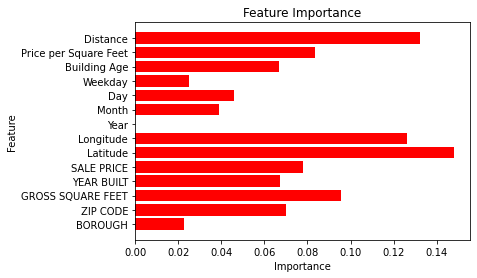

In [10]:
import matplotlib.pyplot as plt

feature_names = X_train.columns
plt.barh(range(len(importances)), importances, color="r", align="center")  # Use plt.barh for horizontal bars
plt.yticks(range(len(importances)), feature_names)  # Use plt.yticks for the y-axis
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

* Use balanced class weight to deal with imbalanced data

In [11]:
steps = [('Rescale', StandardScaler()),
         ('tree', RandomForestClassifier(random_state=42, class_weight='balanced'))]
rf_model_ba = Pipeline(steps)

rf_model_ba.fit(X_train, y_train)

Pipeline(steps=[('Rescale', StandardScaler()),
                ('tree',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [12]:
y_train_pred = rf_model_ba.predict(X_train)
y_test_pred = rf_model_ba.predict(X_test)

In [13]:
print(classification_report(y_train, y_train_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56329
           1       1.00      1.00      1.00     16546
           2       1.00      1.00      1.00        11

    accuracy                           1.00     72886
   macro avg       1.00      1.00      1.00     72886
weighted avg       1.00      1.00      1.00     72886



In [14]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14194
           1       0.88      0.68      0.77      4025
           2       0.00      0.00      0.00         3

    accuracy                           0.91     18222
   macro avg       0.60      0.55      0.57     18222
weighted avg       0.91      0.91      0.90     18222



/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Use SMOTE to deal with imbalanced data

In [15]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [17]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56329
           1       1.00      1.00      1.00     16546
           2       1.00      1.00      1.00        11

    accuracy                           1.00     72886
   macro avg       1.00      1.00      1.00     72886
weighted avg       1.00      1.00      1.00     72886



In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14194
           1       0.78      0.74      0.76      4025
           2       0.00      0.00      0.00         3

    accuracy                           0.90     18222
   macro avg       0.57      0.56      0.56     18222
weighted avg       0.89      0.90      0.89     18222



* Both don't work. Decide to merge category 2 into category 1.

In [21]:
df['Match'] = df['Match'].replace(2, 1)

## 5.1 Logistic Regression

In [22]:
df['Match'].value_counts()

0    70523
1    20585
Name: Match, dtype: int64

In [23]:
baseline = 20585/(70523+20585)
baseline

0.22594064187557625

### 5.1.1 Prediction with default settings

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [69]:
features = ['GROSS SQUARE FEET', 'SALE PRICE', 'Month','Day', 'Building Age','Price per Square Feet','Distance']
target = 'Match'

In [70]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [71]:
steps = [('Rescale', StandardScaler()),
         ('logr', LogisticRegression())]
model = Pipeline(steps)

model.fit(X_train, y_train)

Pipeline(steps=[('Rescale', StandardScaler()), ('logr', LogisticRegression())])

In [72]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [73]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     56329
           1       0.62      0.02      0.03     16557

    accuracy                           0.77     72886
   macro avg       0.70      0.51      0.45     72886
weighted avg       0.74      0.77      0.68     72886



In [74]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     14194
           1       0.64      0.02      0.04      4028

    accuracy                           0.78     18222
   macro avg       0.71      0.51      0.46     18222
weighted avg       0.75      0.78      0.69     18222



In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[56172,   157],
       [16299,   258]])

In [76]:
confusion_matrix(y_test, y_test_pred)

array([[14153,    41],
       [ 3954,    74]])

In [ ]:
                Actual Positive    Actual Negative
Predicted Positive      TP               FP
Predicted Negative      FN               TN

### 5.1.2 Prediction with balanced class weights

In [77]:
steps = [('Rescale', StandardScaler()),
         ('logr', LogisticRegression(class_weight = 'balanced'))]
ba_model = Pipeline(steps)

ba_model.fit(X_train, y_train)

Pipeline(steps=[('Rescale', StandardScaler()),
                ('logr', LogisticRegression(class_weight='balanced'))])

In [78]:
y_train_pred_ba = ba_model.predict(X_train)
y_test_pred_ba = ba_model.predict(X_test)

In [79]:
print(classification_report(y_train, y_train_pred_ba))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77     56329
           1       0.37      0.58      0.45     16557

    accuracy                           0.68     72886
   macro avg       0.61      0.64      0.61     72886
weighted avg       0.74      0.68      0.70     72886



In [80]:
print(classification_report(y_test, y_test_pred_ba))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78     14194
           1       0.36      0.57      0.45      4028

    accuracy                           0.68     18222
   macro avg       0.61      0.64      0.61     18222
weighted avg       0.75      0.68      0.70     18222



In [81]:
confusion_matrix(y_train, y_train_pred_ba)

array([[39715, 16614],
       [ 6908,  9649]])

In [82]:
confusion_matrix(y_test, y_test_pred_ba)

array([[10142,  4052],
       [ 1715,  2313]])

### 5.1.3 Probability with the default settings

In [83]:
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

In [84]:
import matplotlib.pylab as plt
%matplotlib inline

/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


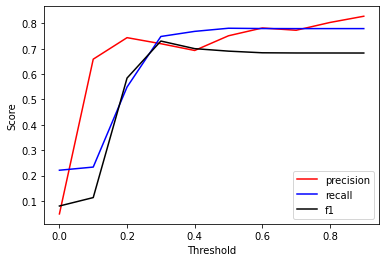

In [85]:
# Plot metrics scores v.s. threshold
from sklearn.metrics import precision_score, recall_score, f1_score

# thresholds = np.linspace(0, 1, 10)
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = []
recalls = []
f1s = []
ave = "weighted"

for threshold in thresholds:
    y_test_predic = (y_test_proba[:, 1] > threshold).astype(int)
    precisions.append(precision_score(y_test, y_test_predic, average=ave))
    recalls.append(recall_score(y_test, y_test_predic, average=ave))
    f1s.append(f1_score(y_test, y_test_predic, average=ave))

plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

### 5.1.4 Probability with balanced settings

In [86]:
y_train_proba_ba = ba_model.predict_proba(X_train)
y_test_proba_ba = ba_model.predict_proba(X_test)

/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


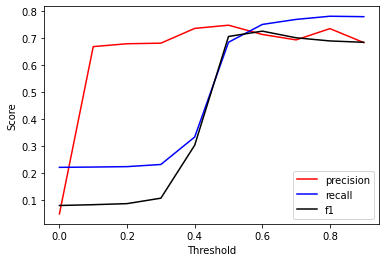

In [87]:
# Plot metrics scores v.s. threshold
from sklearn.metrics import precision_score, recall_score, f1_score

# thresholds = np.linspace(0, 1, 10)
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = []
recalls = []
f1s = []
ave = "weighted"

for threshold in thresholds:
    y_test_predic_ba = (y_test_proba_ba[:, 1] > threshold).astype(int)
    precisions.append(precision_score(y_test, y_test_predic_ba, average=ave))
    recalls.append(recall_score(y_test, y_test_predic_ba, average=ave))
    f1s.append(f1_score(y_test, y_test_predic_ba, average=ave))

plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

### 5.1.5 ROC AUC with the default settings

In [88]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_proba[:, 1])

0.663342214055406

In [89]:
roc_auc_score(y_test, y_test_proba[:, 1])

0.6645347352945333

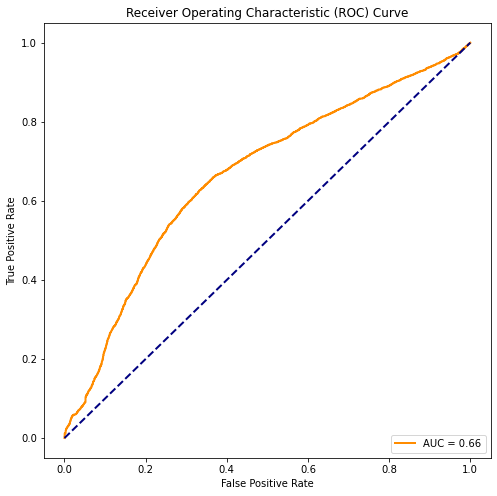

In [90]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba[:, 1], pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 5.1.6 ROC AUC with balanced settings

In [91]:
roc_auc_score(y_train, y_train_proba_ba[:, 1])

0.6673332287891597

In [92]:
roc_auc_score(y_test, y_test_proba_ba[:, 1])

0.6690709681377882

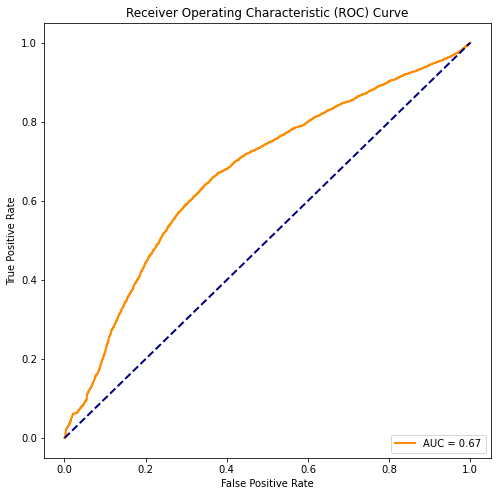

In [93]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba_ba[:, 1], pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 5.2 Random Forest

### 5.2.1 Original run

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
steps = [('Rescale', StandardScaler()),
         ('tree', RandomForestClassifier(random_state=42))]
rf_model2 = Pipeline(steps)

rf_model2.fit(X_train, y_train)

Pipeline(steps=[('Rescale', StandardScaler()),
                ('tree', RandomForestClassifier(random_state=42))])

In [96]:
y_train_pred = rf_model2.predict(X_train)
y_test_pred = rf_model2.predict(X_test)

In [97]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56329
           1       1.00      1.00      1.00     16557

    accuracy                           1.00     72886
   macro avg       1.00      1.00      1.00     72886
weighted avg       1.00      1.00      1.00     72886



In [98]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     14194
           1       0.82      0.53      0.65      4028

    accuracy                           0.87     18222
   macro avg       0.85      0.75      0.78     18222
weighted avg       0.87      0.87      0.86     18222



In [99]:
confusion_matrix(y_train, y_train_pred)

array([[56318,    11],
       [   14, 16543]])

In [100]:
confusion_matrix(y_test, y_test_pred)

array([[13711,   483],
       [ 1879,  2149]])

### 5.2.2 ROC AUC

In [103]:
# Make predictions on the test set
y_pred_proba = rf_model2.predict_proba(X_test)  # Probability of the positive class

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc:.4f}')

ROC AUC Score: 0.8849


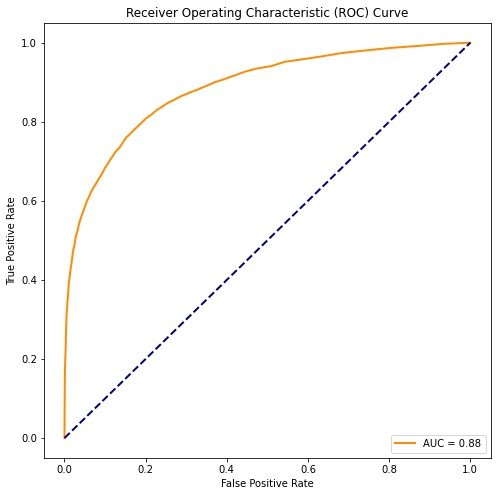

In [104]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 5.2.3 Feature importance

In [105]:
importances = rf_model2.steps[1][1].feature_importances_
importances

array([0.1806656 , 0.14207495, 0.06983604, 0.08856334, 0.13290451,
       0.13837654, 0.24757902])

([<matplotlib.axis.XTick at 0x7fdc71db5ac0>,
 [Text(0, 0, 'GROSS SQUARE FEET'),
  Text(1, 0, 'SALE PRICE'),
  Text(2, 0, 'Month'),
  Text(3, 0, 'Day'),
  Text(4, 0, 'Building Age'),
  Text(5, 0, 'Price per Square Feet'),
  Text(6, 0, 'Distance')])

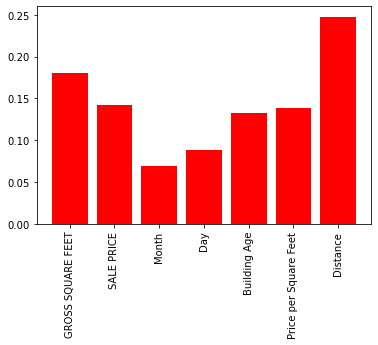

In [107]:
feature_names = X_train.columns
plt.bar(range(len(importances)), importances, color="r", align = "center")
plt.xticks(range(len(importances)), feature_names, rotation='vertical')

### 5.2.4 Tune hyperparameters

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

steps = [('Rescale', StandardScaler()),
         ('tree', RandomForestClassifier(random_state=42))]
rf_model2 = Pipeline(steps)

param_grid = {
              'tree__max_depth': [3, 6, 9, 20, 50, 100], #default is None, which means infinity
              'tree__min_samples_leaf': [1, 3, 5, 10, 20],
              'tree__min_samples_split': [2, 3, 5, 8]                
             }

grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=3, scoring='precision')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [110]:
# Predict on the training set
y_train_pred = best_rf_model.predict(X_train)

# Predict on the testing set
y_test_pred = best_rf_model.predict(X_test)

In [111]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     56329
           1       0.84      0.06      0.12     16557

    accuracy                           0.78     72886
   macro avg       0.81      0.53      0.50     72886
weighted avg       0.80      0.78      0.70     72886



In [112]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     14194
           1       0.79      0.07      0.12      4028

    accuracy                           0.79     18222
   macro avg       0.79      0.53      0.50     18222
weighted avg       0.79      0.79      0.71     18222



In [113]:
importances = best_rf_model.steps[1][1].feature_importances_
importances

array([0.35438794, 0.14815735, 0.00177482, 0.00063897, 0.13420219,
       0.22004941, 0.14078932])

([<matplotlib.axis.XTick at 0x7fdc71d897c0>,
 [Text(0, 0, 'GROSS SQUARE FEET'),
  Text(1, 0, 'SALE PRICE'),
  Text(2, 0, 'Month'),
  Text(3, 0, 'Day'),
  Text(4, 0, 'Building Age'),
  Text(5, 0, 'Price per Square Feet'),
  Text(6, 0, 'Distance')])

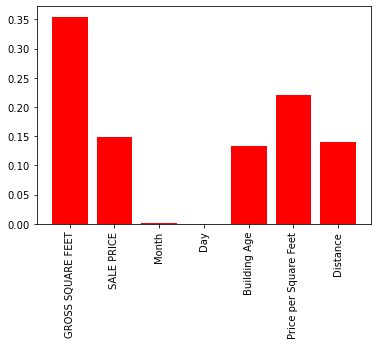

In [114]:
feature_names = X_train.columns
plt.bar(range(len(importances)), importances, color="r", align = "center")
plt.xticks(range(len(importances)), feature_names, rotation='vertical')

## 5.3 XGBoost

### 5.3.1 Oringal run

In [115]:
from xgboost import XGBClassifier

In [116]:
steps = [('Rescale', StandardScaler()),
         ('xgb', XGBClassifier(random_state=42))]
xgb_model = Pipeline(steps)

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('Rescale', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [117]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

In [118]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     56329
           1       0.86      0.56      0.68     16557

    accuracy                           0.88     72886
   macro avg       0.87      0.77      0.80     72886
weighted avg       0.88      0.88      0.87     72886



In [119]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     14194
           1       0.78      0.49      0.60      4028

    accuracy                           0.86     18222
   macro avg       0.83      0.73      0.76     18222
weighted avg       0.85      0.86      0.84     18222



In [120]:
confusion_matrix(y_train, y_train_pred)

array([[54857,  1472],
       [ 7203,  9354]])

In [121]:
confusion_matrix(y_test, y_test_pred)

array([[13647,   547],
       [ 2049,  1979]])

### 5.3.2 ROC AUC

In [122]:
# Make predictions on the test set
y_pred_proba = xgb_model.predict_proba(X_test)  # Probability of the positive class

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc:.4f}')

ROC AUC Score: 0.8726


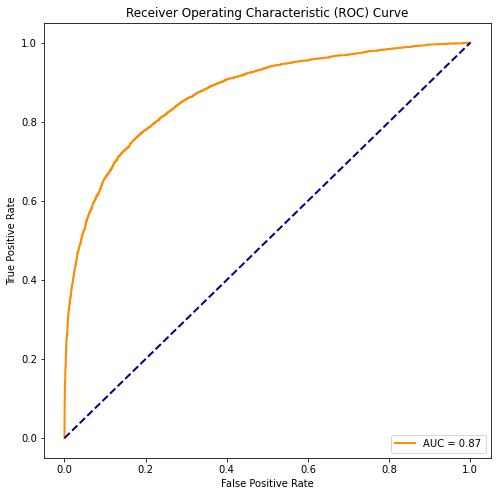

In [124]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 5.2.3 Feature importance

In [125]:
importances = xgb_model.steps[1][1].feature_importances_
importances

array([0.31856808, 0.10480808, 0.0568633 , 0.04282185, 0.17273962,
       0.1126598 , 0.19153926], dtype=float32)

([<matplotlib.axis.XTick at 0x7fdc800367f0>,
 [Text(0, 0, 'GROSS SQUARE FEET'),
  Text(1, 0, 'SALE PRICE'),
  Text(2, 0, 'Month'),
  Text(3, 0, 'Day'),
  Text(4, 0, 'Building Age'),
  Text(5, 0, 'Price per Square Feet'),
  Text(6, 0, 'Distance')])

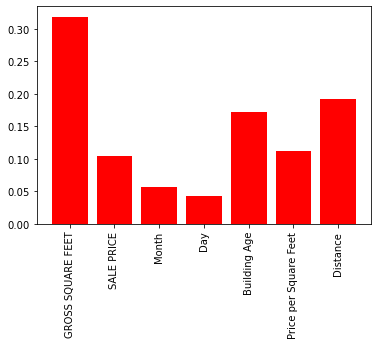

In [126]:
feature_names = X_train.columns
plt.bar(range(len(importances)), importances, color="r", align = "center")
plt.xticks(range(len(importances)), feature_names, rotation='vertical')

### 5.3.4 Tune hyperparameters